## Modules

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plt.style.use('ggplot')
from matplotlib import pyplot
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
train_size = 0.67

## 1. Load the data and explore them, showing size, structure and histograms of numeric data; show the histogram of the frequencies of the class labels, contained in the “language” column

Reading csv file and DataExploration

In [ ]:
#load the data
url='/content/exam2022_01_13.csv'
df=pd.read_csv(url)


In [ ]:
#Show few rows and columns
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [ ]:
#Show the size of the dataset
df.size

4277

In [ ]:
#show the shape
df.shape

(329, 13)

In [ ]:
#show the columns of dataset
df.columns

Index(['language', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12'],
      dtype='object')

Histrogram of Numeric Data

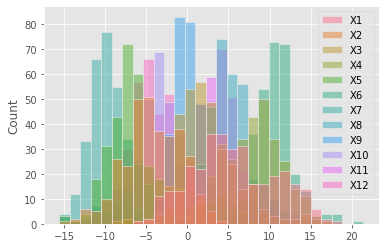

In [ ]:
sns.histplot(df);

Show the histogram of the frequencies of the class labels, contained in the “language” column

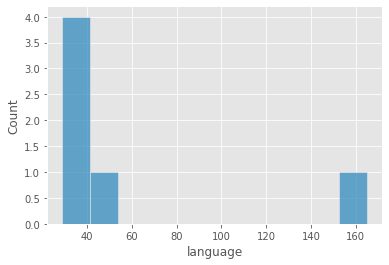

In [ ]:
freq = df.language.value_counts()
sns.histplot(freq);

## 2. Drop the rows with NaN values, if any, show the shape of the dataset after this cleaning

**Comment:** first we need to find the total sum of the null values with isnull().sum() and then eliminate the null values with dropna() function

In [ ]:
#total number of nan values
df.isnull().sum()

language    0
X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10         8
X11         0
X12         0
dtype: int64

Comment: here column X10 has 8 null values which will delete with help of dropna() function

In [ ]:
df=df.dropna()

In [ ]:
#verify the null values drop or not
df.isnull().sum()

language    0
X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10         0
X11         0
X12         0
dtype: int64

show the shape of the dataset after cleaning

In [ ]:
df.shape

(321, 13)

## 3. tune the hyper–parameters of Model1 with Cross Validation on the training set, optimize for recall_macro

Split the data into x and y

In [ ]:
X=df.drop('language', axis=1)
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [ ]:
#let the putting last column as y
y=df['language']
y.head()

0    ES
1    ES
2    ES
3    ES
4    ES
Name: language, dtype: object

Split the X and y into train and test

In [ ]:
random_state=42
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = random_state)
print("Xtrain shape: {}".format(X_train.shape))
print("Xtest shape: {}".format(X_test.shape))

Xtrain shape: (240, 12)
Xtest shape: (81, 12)


**comment:** let me choose the first model DescisionTree as model1 and second model as Kneighbour for model2.

lets start with the Model1

### DecisionTree-Model1

In [ ]:
model1_estimator = DecisionTreeClassifier(random_state=random_state)


In [ ]:
score ='recall_macro'
cv = 5 #number of split for cross validation
model1_param = {'criterion':['gini', 'entropy'], 'max_depth':list(range(1,10)), 'min_samples_split': range(2,10)}
model1=GridSearchCV(model1_estimator,model1_param,scoring=score, cv=5)


In [ ]:
#fit the estimator with the train data
model1.fit(X_train,y_train)

print("The best found hyperparameters are: {}".format(model1.best_params_))
print("The corresponding {} on validation is: {:.2f}%".format(score, model1.best_score_*100))

The best found hyperparameters are: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}
The corresponding recall_macro on validation is: 60.65%


## 4. produce a classification report for Model1 on the test set

In [ ]:
y_pred1=model1.predict(X_test)
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

          ES       0.78      0.88      0.82         8
          FR       0.50      0.71      0.59         7
          GE       0.33      0.33      0.33         9
          IT       0.40      0.36      0.38        11
          UK       0.20      0.17      0.18         6
          US       0.82      0.78      0.79        40

    accuracy                           0.63        81
   macro avg       0.50      0.54      0.52        81
weighted avg       0.63      0.63      0.63        81



## 5. produce the confusion matrix for Model1 on the test set

The accuracy on test set is 62.96%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


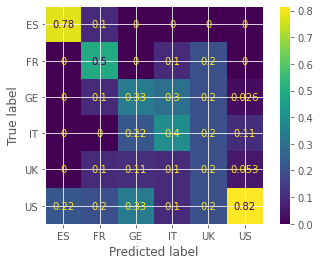

In [ ]:
accury_score1=accuracy_score(y_test,y_pred1)
print("The accuracy on test set is {:.2f}%".format(accury_score1*100))
plot_confusion_matrix(model1, X_test, y_test, normalize='pred');

## 6. tune the hyper–parameters of Model2 with Cross Validation on the training set, optimize for recall_macro .

### Model2-Kneighbour

In [ ]:
model2_estimator = KNeighborsClassifier()

In [ ]:
score = 'recall_macro'
cv = 5 #number of split for cross validation
model2_param = {'weights':['distance', 'uniform'], 'n_neighbors':[3,5,7,9,11]}
model2=GridSearchCV(model2_estimator,model2_param,scoring=score, cv=5)

In [ ]:
#fit the train data into model2
model2.fit(X_train,y_train)
print("The best found hyperparameters are: {}".format(model2.best_params_))
print("The corresponding {} on validation is: {:.2f}%".format(score, model2.best_score_*100))

The best found hyperparameters are: {'n_neighbors': 3, 'weights': 'distance'}
The corresponding recall_macro on validation is: 78.87%


## 7. produce a classification report for Model2 on the test set

In [ ]:
y_pred2=model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

          ES       1.00      0.88      0.93         8
          FR       0.78      1.00      0.88         7
          GE       0.70      0.78      0.74         9
          IT       0.86      0.55      0.67        11
          UK       0.50      0.50      0.50         6
          US       0.86      0.90      0.88        40

    accuracy                           0.81        81
   macro avg       0.78      0.77      0.76        81
weighted avg       0.82      0.81      0.81        81



## 8. produce the confusion matrix for Model2 on the test set

The accuracy on test set is 81.48%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


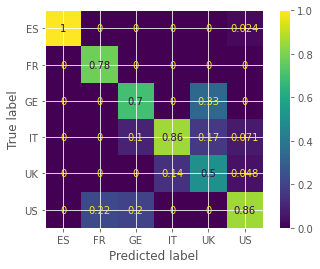

In [ ]:
accury_score2=accuracy_score(y_test,y_pred2)
print("The accuracy on test set is {:.2f}%".format(accury_score2*100))
plot_confusion_matrix(model2, X_test, y_test, normalize='pred');